# Recommender System Amazon Data

With this notebook i intend to demostrate my abilites to create a recommender system using data that I sourced from the web. I chose a data set from the Amazon website for Musical Instruments reviews. <br><br>The data can be found at this website <br>
<a href='http://jmcauley.ucsd.edu/data/amazon/'>http://jmcauley.ucsd.edu/data/amazon/</a><br>
<br> I decided to focus on a modest data set of 10,261 reviews reviews as I felt this would be a good nunmber to demostrate a recommender system with.<br>The Idea of a Recommender system is to recommend products that you might wish to purchase. This is based on the buying patterns of other users. Basically - the person who bought this also bought this - "We think you might like it!"

<h2>Importing the Data from the site</h2>

We downloaded the following file which contains the reviews.<br><ah ref = "http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Musical_Instruments_5.json.gz">http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Musical_Instruments_5.json.gz</a>
<br>This file is a Gzip file and can be used to compress data. I downloaded this file to a local folder and will extract it using Pandas and the Gzip package



In [35]:
#code here sourced from http://jmcauley.ucsd.edu/data/amazon/
import pandas as pd
import gzip

location = 'C:\\Users\\Glandore\\Desktop\\Github\\Amazon Data\\reviews_Musical_Instruments_5.json.gz'

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF(location)

Now we have our data set. Lets examine the first few rows using the head command.

In [36]:
df.head(4)

,reviewerID,asin,reviewerName,helpful,unixReviewTime,reviewText,overall,reviewTime,summary
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",1393545600,"Not much to write about here, but it does exac...",5.0,"02 28, 2014",good
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",1363392000,The product does exactly as it should and is q...,5.0,"03 16, 2013",Jake
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",1377648000,The primary job of this device is to block the...,5.0,"08 28, 2013",It Does The Job Well
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",1392336000,Nice windscreen protects my MXL mic and preven...,5.0,"02 14, 2014",GOOD WINDSCREEN FOR THE MONEY


<H2>Explority Data Analysis</H2><br>When working with a large data set it is good to get a feel of the data by exploring it using python. The data set fields are.
<br>
<b>ReviewerID</b> <br>
<b>Asin</b> <br>
<b>ReviewerName</b> <br>
<b>Helpful</b> <br>
<b>UnixReviewTime</b> <br>
<b>ReviewText</b>
<br><b>Overall</b><br>
<b>ReviewTime</b> <br>
<b>Summary</b> <br>



## Visualization Imports

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

Let's create a ratings dataframe with average rating and number of ratings:

In [38]:
df.groupby('asin')['overall'].mean().sort_values(ascending=False).head()

asin
1384719342    5.0
B0033P1O6S    5.0
B0009EQOES    5.0
B001V5K2S8    5.0
B001W99HE8    5.0
Name: overall, dtype: float64

Now we create a query to show the highest number of ratings.

In [39]:
df.groupby('asin')['overall'].count().sort_values(ascending=False).head()

asin
B003VWJ2K8    163
B0002E1G5C    143
B0002F7K7Y    116
B003VWKPHC    114
B0002H0A3S     93
Name: overall, dtype: int64

Now we look at the average of the ratings.

In [40]:
ratings = pd.DataFrame(df.groupby('asin')['overall'].mean())
ratings.head()

,overall
asin,
1384719342,5.000000
B00004Y2UT,4.666667
B00005ML71,3.800000
B000068NSX,4.571429
B000068NTU,4.800000


Here we now need to create a data frame that shows the ratings and the number of ratings per product.

In [41]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('asin')['overall'].count())
ratings.head()

,overall,num of ratings
asin,,
1384719342,5.000000,5
B00004Y2UT,4.666667,6
B00005ML71,3.800000,5
B000068NSX,4.571429,7
B000068NTU,4.800000,5



## Now a few histograms
<br>Firstly lets look at the product with the highest amount of ratings.

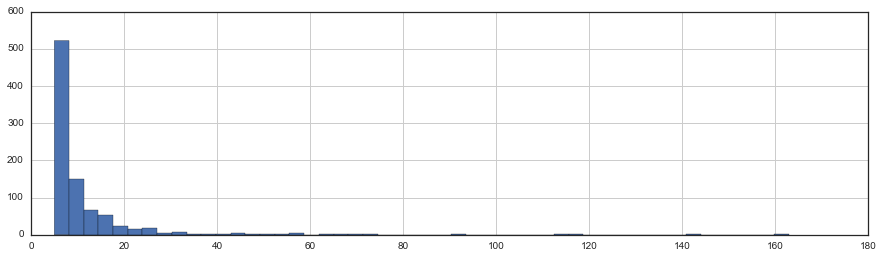

In [42]:
plt.figure(figsize=(15,4))
ratings['num of ratings'].hist(bins=50)

Now lets look at the overall rating mark - which was the most popular

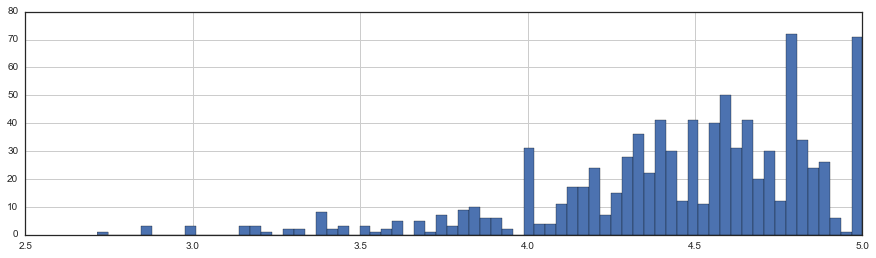

In [54]:
plt.figure(figsize=(15,4))
ratings['overall'].hist(bins=70)

We can then use a joint plot to show the distribution of count of ratings versus overall score.

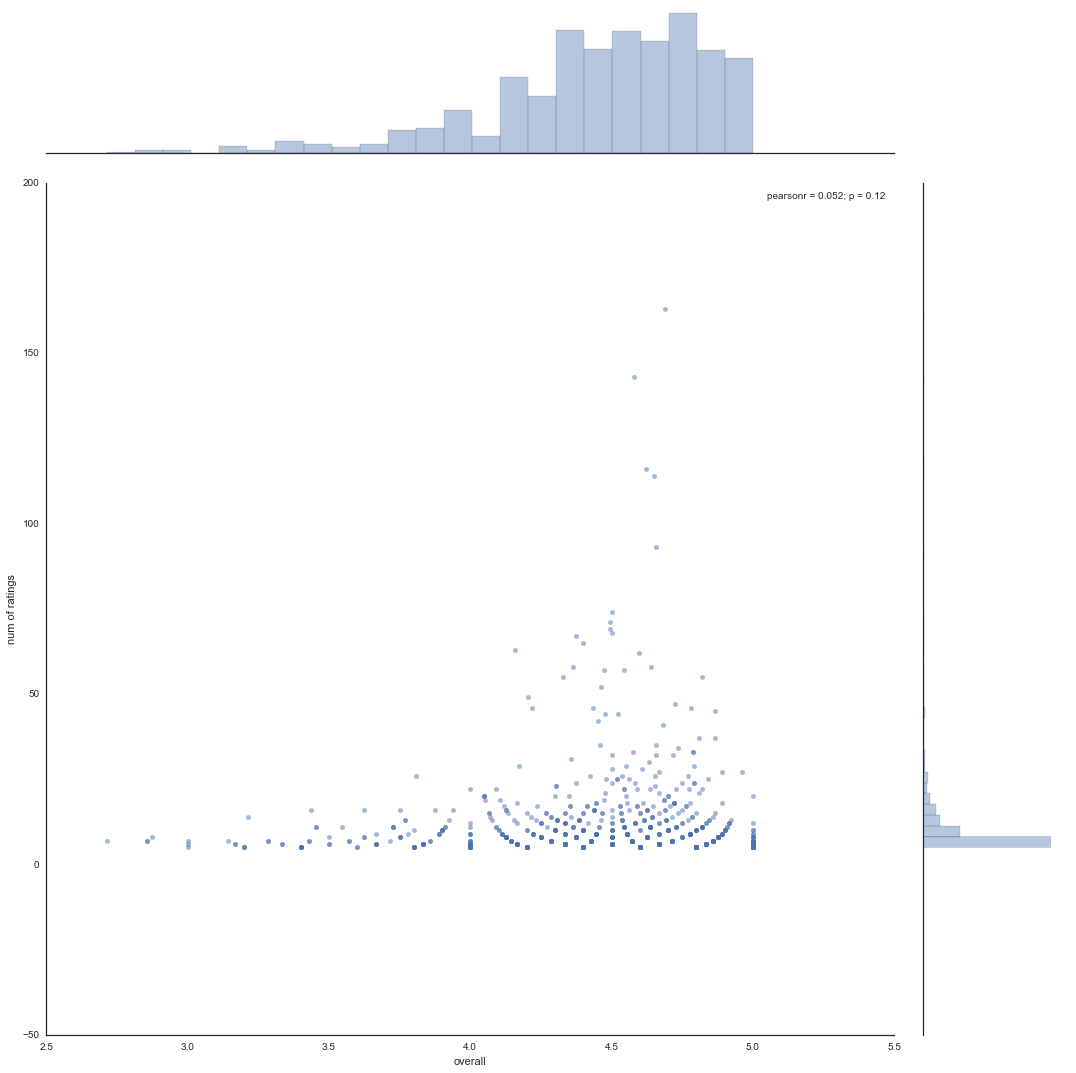

In [55]:
sns.jointplot(x='overall',y='num of ratings',size=15,data=ratings,alpha=0.5)

<h2>Recommending Similar Amazon Products</h2> <br><br>
Now lets get into the real stuff. We need to create a model that will show us similar products that we can then recommend to a user that bought a product. <br> We can do this by creating a matrix that shows the reviewerID on one side and then the products bought going across. This will be a very large table and will have a lot of Na values as there are a lot of products.

We do this by using the Pandas Pivot_table function, stating that the reviewerID as the index value. 

In [58]:
Review_Matix = df.pivot_table(index='reviewerID',columns='asin',values='overall')
Review_Matix.head(5)

asin,1384719342,B00004Y2UT,B00005ML71,B000068NSX,B000068NTU,B000068NVI,B000068NW5,B000068NZC,B000068NZG,B000068O1N,...,B00EPWAQS0,B00EQDITGO,B00F2PKRJW,B00FXKIG5I,B00GTSM8FW,B00H02C9TG,B00HFRXACG,B00IZCSW3M,B00J4TBMVO,B00JBIVXGC
reviewerID,,,,,,,,,,,,,,,,,,,,,
A00625243BI8W1SSZNLMD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A10044ECXDUVKS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A102MU6ZC9H1N6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A109JTUZXO61UY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A109ME7C09HM2M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


So we have our matrix of who bought what, we need to find now some products the have a large amount of ratings so the we can compare them - and determine the correclation between them. This will show if they are similar.

In [59]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,overall,num of ratings
asin,,
B003VWJ2K8,4.687117,163
B0002E1G5C,4.580420,143
B0002F7K7Y,4.620690,116
B003VWKPHC,4.649123,114
B0002H0A3S,4.655914,93
B0002CZVXM,4.500000,74
B0006NDF8A,4.492958,71
B0009G1E0K,4.492754,69
B0002E2KPC,4.500000,68


Noe lets choose two of the product keys. Let just say the top two products 

In [60]:
Product_1_user_ratings = Review_Matix['B003VWJ2K8']
Product_2_user_ratings = Review_Matix['B0002E1G5C']
Product_1_user_ratings.head()

reviewerID
A00625243BI8W1SSZNLMD    NaN
A10044ECXDUVKS           NaN
A102MU6ZC9H1N6           5.0
A109JTUZXO61UY           NaN
A109ME7C09HM2M           NaN
Name: B003VWJ2K8, dtype: float64

So we need to clean the NaN values as they are no use to us. We can then use corrwith() method to get correlations between two pandas series:

First we create the correlation table for the two data sets. And then we apply the Drop NaN method to remove the unwanted NaN records.

In [61]:
Product_1_corr = Review_Matix.corrwith(Product_1_user_ratings)
Product_2_corr  = Review_Matix.corrwith(Product_2_user_ratings)

#check one of the result sets.
print 'product 1'
Product_1_corr.head(10)

product 1


asin
1384719342         NaN
B00004Y2UT         NaN
B00005ML71         NaN
B000068NSX         NaN
B000068NTU         NaN
B000068NVI         NaN
B000068NW5    0.478091
B000068NZC         NaN
B000068NZG         NaN
B000068O1N         NaN
dtype: float64

So we need to remove the NaN values and then sort the data to get a good idea of what has the cloest corelation.

In [62]:
Product_1_corr_final = pd.DataFrame(Product_1_corr,columns=['Correlation'])
Product_1_corr_final.dropna(inplace=True)
Product_1_corr_final.head()

,Correlation
asin,
B000068NW5,0.478091
B0002CZSJO,0.050965
B0002CZUUG,-0.254824
B0002CZVW8,-0.500000
B0002CZVXM,1.000000


Now if we sort the dataframe by correlation, we should get the most similar items, however note that we get some results that don't really make sense. This is because there are a lot of items only bought once by users who also bought product_2.

In [63]:
#sort the table

Product_1_corr_final.sort_values('Correlation',ascending=False).head(5)

,Correlation
asin,
B00BU9KCXK,1.0
B0035LCFRW,1.0
B000A6GY1I,1.0
B0002GMGYA,1.0
B000CD3QY2,1.0


So what we want to do is to merge the correlation data frame withe the ratings data frame that we created earlier that shows the number of reviews and then filter on proiducts that have a lot of reviews.

In [64]:
Product_1_corr_final = Product_1_corr_final.join(ratings['num of ratings'])
Product_1_corr_final.head()

,Correlation,num of ratings
asin,,
B000068NW5,0.478091,52
B0002CZSJO,0.050965,28
B0002CZUUG,-0.254824,22
B0002CZVW8,-0.500000,6
B0002CZVXM,1.000000,74


Now sort the values and filter out some of the single reviews and it seems a bit better..

In [65]:
Product_1_corr_final[Product_1_corr_final['num of ratings']>20].sort_values('Correlation',ascending=False).head(10)

,Correlation,num of ratings
asin,,
B00BU9KCXK,1.000000,21
B004XNK7AI,1.000000,65
B0002CZVXM,1.000000,74
B003VWJ2K8,1.000000,163
B0002E1H9W,1.000000,21
B0002GMGYA,1.000000,58
B0002F7K7Y,0.877778,116
B0002GWFEQ,0.666667,33
B0026RB0G8,0.630196,31


So we can now see by looking at the above table that people who reviewed and liked product 1 also liked the products listed above with a 1.0 value for a strong correlation. 0 is no correlation.

Now we can condese the steps and create same for product 2 also.

In [53]:
Product_2_corr_final = pd.DataFrame(Product_2_corr,columns=['Correlation'])
Product_2_corr_final.dropna(inplace=True)
Product_2_corr_final = Product_2_corr_final.join(ratings['num of ratings'])
Product_2_corr_final[Product_2_corr_final['num of ratings']>20].sort_values('Correlation',ascending=False).head(10)

,Correlation,num of ratings
asin,,
B0002KZE7C,1.000000,25
B0002D0E8S,1.000000,41
B00154OJOI,1.000000,25
B000VJJQUU,1.000000,29
B004XNK7AI,1.000000,65
B0002E1G5C,1.000000,143
B003B01QR2,0.878310,22
B0002GXF8Q,0.866025,33
B0002E2KPC,0.712845,68


And there we have a system where we can recommend a product to a user based on other users ratings.....